<a href="https://colab.research.google.com/github/Sriram1717/World-Bank-Global-Education-Analysis/blob/main/Notebook_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_country_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsCountry-Series.csv')
df_country = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsCountry.csv')
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsData.csv')
# df_footnote = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsFootNote.csv')
# df_series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Week 4/Copy of EdStatsSeries.csv')

In [ ]:
def get_reqDF(df,col,indicator):
  count = 0
  my_list = []
  for elem in col:
    if indicator in elem:
      my_list.append(df.loc[count,:])     
    else:
      pass
    count = count + 1
  
  return pd.DataFrame(my_list).reset_index(drop=True)

In [ ]:
df_exp = get_reqDF(df_data,df_data['Indicator Name'],'Expenditure')

In [ ]:
df_exp['Indicator Name'].unique()

array(['Expenditure on education as % of total government expenditure (%)',
       'Expenditure on education not allocated by level as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of government expenditure on education (%)',
       'Expenditure on lower secondary as % of total government expenditure (%)',
       'Expenditure on post-secondary non-tertiary as % of government expenditure on education (%)',
       'Expenditure on post-secondary non-tertiary as % of total government expenditure (%)',
       'Expenditure on pre-primary as % of government expenditure on education (%)',
       'Expenditure on pre-primary as % of total government expenditure (%)',
       'Expenditure on primary as % of government expenditure on education (%)',
       'Expenditure on primary as % of total government expenditure (%)',
       'Expenditure on secondary and post-secondary non-tertiary vocational as % of government expenditure on education (%)',
       '

### Looks like there are many differect variations of expenditure, for now I'll take education in general but I'll create a function to consider any variation of expenditure.

In [ ]:
def get_data(df,df_subset,indicator):
  return df[df_subset == indicator]

In [ ]:
df_expGen = get_data(df_data,df_data['Indicator Name'],'Expenditure on education as % of total government expenditure (%)')

In [ ]:
df_expGen

In [ ]:
df_expGen.info()

In [ ]:
df_expGen.columns

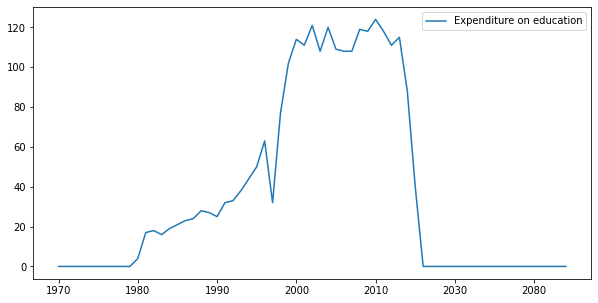

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
df_expGen.groupby('Indicator Name')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']].count().T.plot()
plt.legend(labels = ['Expenditure on education'],loc="best")      

### So, not all years have data. Most amount of data is present in years 2000-2015. Since the graph peaks at 2010, let's consider 2010 for our analysis.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

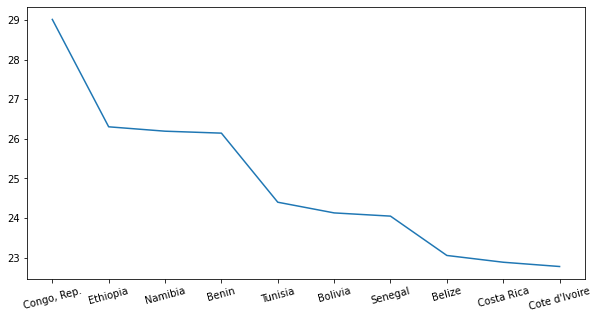

In [ ]:
df_exp_2010 = df_expGen[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]
df_exp_2010 = df_exp_2010[~df_exp_2010['2010'].isna()].reset_index(drop=True).sort_values('2010',ascending= False)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot('Country Name', '2010', data = df_exp_2010[0:10])
plt.xticks(rotation=15)

In [ ]:
df_exp = df_exp[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]
df_exp = df_exp[~df_exp['2010'].isna()]

In [ ]:
df_exp

,Country Name,Country Code,Indicator Name,Indicator Code,2010
450,Afghanistan,AFG,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,17.067560
458,Afghanistan,AFG,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,62.136471
462,Afghanistan,AFG,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,26.693729
464,Afghanistan,AFG,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,9.032170
523,Andorra,AND,Expenditure on education not allocated by leve...,UIS.XPUBP.UK,30.662840
...,...,...,...,...,...
4347,Zimbabwe,ZWE,Expenditure on primary as % of total governmen...,UIS.XGOVEXP.IMF.1,4.498260
4350,Zimbabwe,ZWE,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,25.604900
4351,Zimbabwe,ZWE,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,2.232980
4352,Zimbabwe,ZWE,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,22.815010


In [ ]:
df_exp[df_exp['Country Name'] == 'India'].sort_values('2010',ascending=False)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
2046,India,IND,Expenditure on secondary as % of government ex...,SE.XPD.SECO.ZS,36.985199
2048,India,IND,Expenditure on tertiary as % of government exp...,SE.XPD.TERT.ZS,36.076519
2050,India,IND,Expenditure on upper secondary as % of governm...,UIS.XPUBP.3,26.096001
2042,India,IND,Expenditure on primary as % of government expe...,SE.XPD.PRIM.ZS,25.206591
2034,India,IND,Expenditure on education as % of total governm...,SE.XPD.TOTL.GB.ZS,11.742780
2036,India,IND,Expenditure on lower secondary as % of governm...,UIS.XPUBP.2,10.889210
2047,India,IND,Expenditure on secondary as % of total governm...,UIS.XGOVEXP.IMF.23,4.343090
2049,India,IND,Expenditure on tertiary as % of total governme...,UIS.XGOVEXP.IMF.56,4.236390
2051,India,IND,Expenditure on upper secondary as % of total g...,UIS.XGOVEXP.IMF.3,3.064400
2043,India,IND,Expenditure on primary as % of total governmen...,UIS.XGOVEXP.IMF.1,2.959950


In [ ]:
df_GDP = get_reqDF(df_data,df_data['Indicator Name'],'GDP')
df_GDP['Indicator Name'].unique()

array(['GDP at market prices (constant 2005 US$)',
       'GDP at market prices (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)',
       'Government expenditure in educational institutions as % of GDP (%)',
       'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
       'Government expenditure in pre-primary institutions as % of GDP (%)',
       'Government expenditure in primary institutions as % of GDP (%)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on post-secondary non-tertiary edu

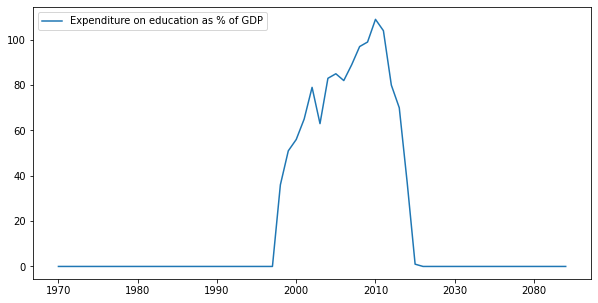

In [ ]:
df_GDP_Edu = df_GDP[df_GDP['Indicator Name'] == 'Government expenditure in educational institutions as % of GDP (%)']
plt.rcParams['figure.figsize'] = [10, 5]
df_GDP_Edu.groupby('Indicator Name')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']].count().T.plot()
plt.legend(labels = ['Expenditure on education as % of GDP'],loc="best") 

### Peak of data available is at 2010 again.

In [ ]:
df_GDP_Edu = df_GDP_Edu[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2010']]
df_GDP_Edu[~df_GDP_Edu['2010'].isna()].reset_index(drop=True).sort_values('2010',ascending= False).reset_index(drop=True)

,Country Name,Country Code,Indicator Name,Indicator Code,2010
0,Cuba,CUB,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,12.83727
1,Timor-Leste,TLS,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,9.86167
2,Moldova,MDA,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,8.79377
3,Namibia,NAM,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,7.57800
4,Denmark,DNK,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,7.35344
...,...,...,...,...,...
104,Guinea-Bissau,GNB,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,1.86424
105,Lebanon,LBN,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,1.62997
106,"Congo, Dem. Rep.",COD,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,1.60244
107,Monaco,MCO,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,1.19108
